## Домашнее задание №1

Выполнил: Хайкин Глеб, ИАД-4

В этом домашнем задании вы познакомитесь с pytorch сами и сможете попрактиковаться в его применении. 

#### План:

1. Простейшие операции в pytorch
2. Пишем Adam и применяем его к ручной модели
3. Обучаем свою первую нейросеть

In [1]:
import os
import sys
import math
import torch
import random
import numpy as np
from tqdm import tqdm
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline
%config InlineBackend.figure_format ='retina'

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

device = 'cuda'

### Простейшие операции на pytorch (2 балла)

**Task**: Cоздайте два случайных тензора (двумерных, не квадратных):

In [2]:
torch.manual_seed(13)
x = torch.randn(5, 6)
y = torch.randn(6, 5)

**Task**: Умножьте их друг на друга, результат запишите в третий тензор без использования оператора `=`, для создания третьего тензора предлагается использовать `torch.empty`:

In [3]:
z = torch.empty(x.shape)
torch.matmul(x, y, out=z)

tensor([[ 1.7036, -5.4603,  1.9726, -2.4793,  4.5468],
        [ 0.7886,  0.5415,  1.8635,  0.5670, -1.2709],
        [-1.9894,  4.2559, -0.2928, -1.6808, -4.8369],
        [-0.4095,  0.0674,  0.9856,  0.6987, -0.7879],
        [-1.2405,  2.8560, -3.7942,  2.0359,  0.1689]])

Посмотрим, сохранился ли результат умножения двух тензоров в тензоре `z`:

In [4]:
z

tensor([[ 1.7036, -5.4603,  1.9726, -2.4793,  4.5468],
        [ 0.7886,  0.5415,  1.8635,  0.5670, -1.2709],
        [-1.9894,  4.2559, -0.2928, -1.6808, -4.8369],
        [-0.4095,  0.0674,  0.9856,  0.6987, -0.7879],
        [-1.2405,  2.8560, -3.7942,  2.0359,  0.1689]])

Да, все в порядке.

**Task**: Реализуйте ReLU используя только pytorch, примените его к тензору `x` (запрещено использование модулей torch.nn и его подмодулей, а также функции torch.relu)

1 вариант:

In [5]:
def relu_forward(x):
    x_new = torch.empty_like(x)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x_new[i, j] = max(0, x[i, j])
            
    return x_new


assert torch.all(F.relu(x) == relu_forward(x))

2 вариант:

In [6]:
def relu_forward(x):
    return (x > 0) * x

assert torch.all(F.relu(x) == relu_forward(x))

**Task**: Сделайте тоже самое c ELU (запрещено использование модулей torch.nn и его подмодулей):

1 вариант:

In [7]:
def elu_forward(x, alpha=1):
    x_new = torch.empty_like(x)
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if x[i, j] > 0:
                x_new[i, j] = x[i, j]
            else:
                x_new[i, j] = alpha * (np.exp(x[i, j]) - 1)

    return x_new

assert torch.allclose(
    F.elu(x),
    elu_forward(x), 
    1e-4
)

2 вариант:

In [8]:
def elu_forward(x, alpha=1):
    return (x > 0) * x + (x < 0) * alpha * (np.exp(x) - 1)

assert torch.allclose(
    F.elu(x),
    elu_forward(x), 
    1e-4
)

**Task**: LeakyReLU (запрещено использование модулей torch.nn и его подмодулей):

1 вариант:

In [9]:
def lrelu_forward(x, alpha):
    x_new = torch.empty_like(x)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if x[i, j] > 0:
                x_new[i, j] = x[i, j]
            else:
    
    x_new[i, j] = alpha * x[i, j]
    
    return x_new

assert torch.all(F.leaky_relu(x, 0.01) == lrelu_forward(x, 0.01))

2 вариант:

In [10]:
def lrelu_forward(x, alpha):
    return (x > 0) * x + (x < 0) * alpha * x

assert torch.all(F.leaky_relu(x, 0.01) == lrelu_forward(x, 0.01))

**Task**: Теперь перейдем к немного более современным функциям активаций, например Mish, напомним как она выглядит:

$$x \cdot tanh(ln(1+e^x))$$

(запрещено использование модулей torch.nn и его подмодулей)

In [11]:
def mish(x):
    return x * np.tanh(np.log(1 + np.exp(x)))

In [12]:
assert torch.allclose(
    mish(torch.tensor([1, 1, 1], dtype=torch.float32)), 
    torch.tensor([0.8651, 0.8651, 0.8651]), 
    atol=1e-4
)

assert torch.allclose(
    mish(torch.tensor([0.6376, 0.4021, 0.6656, 0.3726], dtype=torch.float64)), 
    torch.tensor([0.5014, 0.2908, 0.5280, 0.2663], dtype=torch.float64), 
    atol=1e-4
)

**Task**: Теперь реализуем swish, напомним как она выглядит:

$$x \cdot \sigma(x) = \dfrac{x}{1 + e^{-x}}$$

(запрещено использование модулей torch.nn и его подмодулей)

In [ ]:
def swish(x):
    return x / (1 + np.exp(-x))

In [ ]:
assert torch.allclose(
    swish(torch.tensor([1, 1, 1], dtype=torch.float32)), 
    torch.tensor([0.7311, 0.7311, 0.7311]), 
    atol=1e-4
)

assert torch.allclose(
    swish(torch.tensor([0.6376, 0.4021, 0.6656, 0.3726], dtype=torch.float64)), 
    torch.tensor([0.4171, 0.2409, 0.4396, 0.2206], dtype=torch.float64), 
    atol=1e-4
)

### Пишем Adam и применяем его к логистической регрессии (4 балла)


В данной секции вам нужно сделать две вещи: 

1. Написать свой собственный оптимизатор подобно тому, который мы писали на семинаре
2. Обучить логистическую регрессию побатчево на картинках из датасета 


#### Adam


$$
\begin{eqnarray}
\nabla_w Q(w^{t-1}) &=& \frac{1}{m}\nabla_w \sum_{i=1}^{m} L(f(x_{i};w^{t-1}), y_{i}) \\
m^t_j &=& \beta_1m_j^{t-1} + (1 - \beta_1)(\nabla_w Q(w^{t-1}))_j \\
\hat m^{t}_j &=& \dfrac{m^t_j}{1 - \beta_1^t}\\
\nu^t_j &=& \beta_2 \nu_j^{t-1} + (1 - \beta_2)(\nabla_w Q(w^{t-1}))^2_j \\
\hat \nu^t_j &=& \dfrac{\nu^t_j}{1 - \beta_2^t} \\
w^{t}_j &=& w^{t-1}_j - \frac{\eta_t}{\sqrt{\hat \nu^t_j + \varepsilon}} \hat m^t_j
\end{eqnarray}
$$

In [ ]:
from torch.optim import Optimizer

class InClassOptimizer(Optimizer):
      def step(self):
            with torch.no_grad(): # выключим градиенты
                for group in self.param_groups:
                    self._group_step(group)
      
      def _group_step(self, group):
            raise NotImplementedError()

**Task**: Напишите свою реализацию Adam:

In [ ]:
class Adam(InClassOptimizer):
    def __init__(self, params, lr=0.001, eps=1e-8, beta_1=0.9, beta_2=0.999):
        defaults = dict(lr=lr, eps=eps, beta_1=beta_1, beta_2=beta_2)
        super(Adam, self).__init__(params, defaults)
    
    def _group_step(self, group):
        lr = group['lr']
        eps = group['eps']
        beta_1 = group['beta_1']
        beta_2 = group['beta_2']
      
        for param in filter(lambda x: x.grad is not None, group['params']):
            d_param = param.grad
            self.init_adam_accum(d_param)
            m, v, step = self.get_adam_accum(d_param)
            
            m.mul_(beta_1).add_(1 - beta_1, d_param)
            hat_m = m / (1 - torch.pow(beta_1, step))
            
            v.mul_(beta_2).add_(1 - beta_2, d_param ** 2)
            hat_v = v / (1 - torch.pow(beta_2, step)) 
            
            temp = hat_m / torch.sqrt(hat_v + eps)
            param.add_(temp, alpha=-lr)
            
            step += 1
      
    def init_adam_accum(self, d_param):
        state = self.state[d_param]
        if 'm' not in state:
            state['m'] = torch.zeros_like(d_param)
        if 'v' not in state:
            state['v'] = torch.zeros_like(d_param)
        if 'step' not in state:
            state['step'] = torch.tensor(1)

    def get_adam_accum(self, d_param):
        state = self.state[d_param]
        return (state['m'], state['v'], state['step'])

**Task**: Создайте параметры для обучения логистической регрессии, сделаем Xavier ициализацию, которая выглядит следующим образом: 

$$w \sim U[-\frac{\sqrt{6}}{\sqrt{n_{in} + n_{out}}}, \frac{\sqrt{6}}{\sqrt{n_{in} + n_{out}}}]$$

где: 

* $n_{in}$ — размер входа (в нейронах) 
* $n_{out}$ — размер выхода (в нейронах)

Подумайте над выбором $n_{in}$ и $n_{out}$ самостоятельно. 

In [ ]:
n_in = 784 # так как ниже мы узнаем, что картинка размера 28 x 28
n_out = 10 # так как ниже мы узнаем, что датасет имеет 10 классов

lhs =  - np.sqrt(6) / np.sqrt(n_in + n_out)
rhs = np.sqrt(6) / np.sqrt(n_in + n_out)

weights = torch.from_numpy(np.random.uniform(lhs, rhs, size=(784, 10))).type('torch.FloatTensor')
intercept = torch.from_numpy(np.random.uniform(lhs, rhs, size=10)).type('torch.FloatTensor')

Делаем так, чтобы было requires_grad=True:

In [ ]:
weights.requires_grad_()
intercept.requires_grad_()

tensor([ 0.0454,  0.0741, -0.0203,  0.0466, -0.0503, -0.0483,  0.0729, -0.0486,
         0.0769, -0.0189], requires_grad=True)

In [ ]:
optimizer = Adam([weights, intercept])
loss = nn.CrossEntropyLoss()

Загрузим данные и создадим даталоадеры:

In [ ]:
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

train_data = torchvision.datasets.FashionMNIST('./data', download=True,
                                               transform=transforms.Compose([transforms.ToTensor()]))

train_dataloader = DataLoader(train_data, batch_size=100, shuffle=True, 
                              num_workers=2)

test_data = torchvision.datasets.FashionMNIST('./data', train=False, download=True, 
                                              transform=transforms.Compose([transforms.ToTensor()]))

test_dataloader = DataLoader(test_data, batch_size=100, num_workers=2)

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Посмотрим на батч:

In [ ]:
for images, labels in train_dataloader:
    print(images.shape)
    print(labels)
    break

torch.Size([100, 1, 28, 28])
tensor([7, 2, 5, 9, 0, 5, 1, 3, 3, 3, 1, 5, 9, 0, 2, 0, 1, 9, 0, 2, 3, 1, 1, 0,
        7, 3, 1, 9, 8, 5, 6, 3, 4, 3, 0, 4, 0, 0, 7, 3, 4, 9, 9, 4, 3, 5, 6, 8,
        5, 3, 5, 4, 7, 7, 2, 1, 1, 7, 8, 4, 4, 4, 8, 4, 8, 6, 3, 7, 2, 8, 4, 5,
        5, 1, 0, 5, 3, 1, 5, 0, 9, 8, 5, 4, 1, 8, 7, 4, 9, 9, 6, 9, 1, 2, 6, 3,
        9, 3, 3, 4])


Как видим, он состоит из 100 картинок с одним каналом связи размером 28x28. Посмотрим на картинку из батча.

In [ ]:
images[8].squeeze().shape

torch.Size([28, 28])

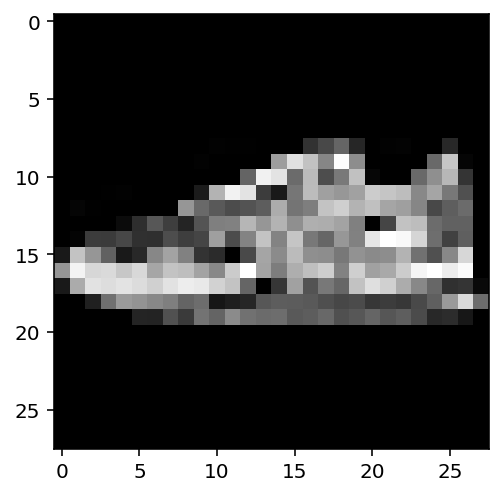

In [ ]:
plt.imshow(images[8].squeeze(), cmap='gray');

Напишите функцию для тренировки логистической регрессии, она должна: 
    
    * Делать предсказания 
    * Считать лосс 
    * Подсчитывать градиенты
    * Делать шаг оптимизации
    * Обнулять посчитанные градиенты
    * Считать метрики 
    * Возвращать полученные метрики
    
После этого предусмотрите возможность визуализировать метрики, чтобы нарисовать картинки, а именно от вас требуется визуализировать: 

    * Зависимость лосса от количества итераций
    * Зависимость доли правильных ответов от количества итераций

По факту нам нужно реализовать следующее:

$$
 \begin{array}{l}
\sigma \left(\begin{bmatrix}
w_{1,1} & w_{1,2} & ... & w_{1,n}\\
w_{2,1} & w_{2,2} & ... & w_{2,n}\\
\vdots  & \vdots  & \ddots  & \vdots \\
w_{k,1} & w_{k,2} & ... & w_{k,n}
\end{bmatrix}\begin{bmatrix}
a^{(0)}_{1}\\
a^{(0)}_{2}\\
\vdots \\
a^{(0)}_{n}
\end{bmatrix} +\begin{bmatrix}
b^{}_{1}\\
b^{}_{2}\\
\vdots \\
b^{}_{k}
\end{bmatrix}\right)
\ =\ \begin{bmatrix}
a^{( 1)}_{1}\\
a^{( 1)}_{2}\\
\vdots \\
a^{( 1)}_{k}
\end{bmatrix}
\end{array},
$$

где $W$ — матрица весов, $\vec{b}$ — вектор свободных коэффициентов, $\vec{a^{(0)}}$ — вектор входящих нейронов одной картинки, $\vec{a^{(1)}}$ — вектор выхода, $\sigma$ — сигмоида

In [ ]:
def network(x, W, b):
    return torch.sigmoid(x.squeeze().view(100, -1) @ weights + b)

Сначала напишем функцию для визуализации метрик.

In [ ]:
plt.style.use('ggplot')

def plot_metric(train_metric, test_metric, title):
    plt.figure()
    plt.title(f'Значение {title} в зависимости от шагов (1 эпоха = {len(train_dataloader)} шагов)', 
              pad=10, fontsize=18, loc='left')
    plt.ylabel(f'{title}', labelpad=10, fontsize=14)
    plt.xlabel('Количество шагов', labelpad=10, fontsize=14)
    plt.plot(train_metric, label='train', zorder=1)
  
    steps = list(range(0, len(train_metric) + 1, int(len(train_metric) / len(test_metric))))[1:]
    plt.scatter(steps, test_metric, marker='+', s=180, c='orange', label='test', zorder=2)
  
    plt.legend(loc='best')
    plt.grid()

    plt.show()

Напишим функцию для тренировки логистической регрессии

In [ ]:
def train_logistic_regression(weights, bias, batch, loss, optimizer):
    images, labels = batch
    images, labels = images.to(device), labels.to(device)

    # Делаем предсказания
    y_pred = network(images, weights.to(device), bias.to(device))

    # Считаем лосс: y_pred — это матрица N x C, где N — количество картинок 
    loss_ = loss(y_pred, labels)
  
    # Подсчитываем градиенты
    loss_.backward()

    # Делаем шаг оптимизации
    optimizer.step() 
        
    # Обнуляем посчитанные градиенты
    optimizer.zero_grad()

    # Считаем метрики
    loss_accum = loss_.item()
    batch_size = y_pred.shape[0]
    batch_loss = loss_accum / batch_size

    y_pred_class = torch.max(y_pred, axis=1)[1]
    num_pred_correct = (y_pred_class == labels).sum().item()
    batch_accuracy = num_pred_correct / batch_size

    return batch_loss, batch_accuracy

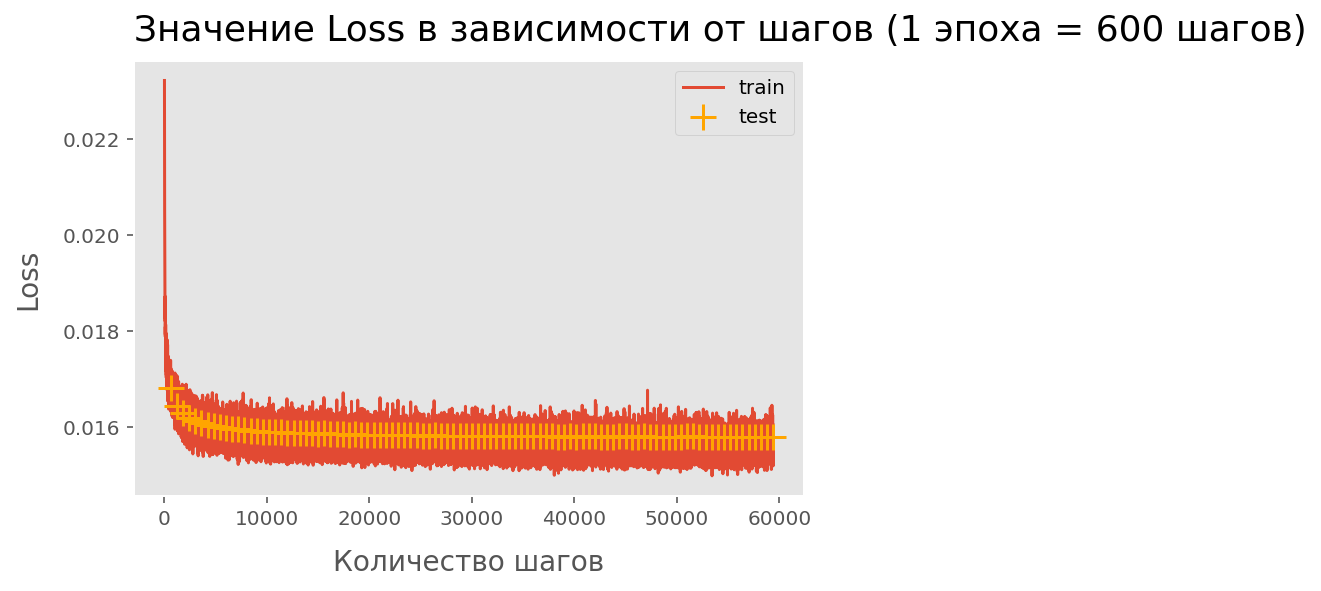

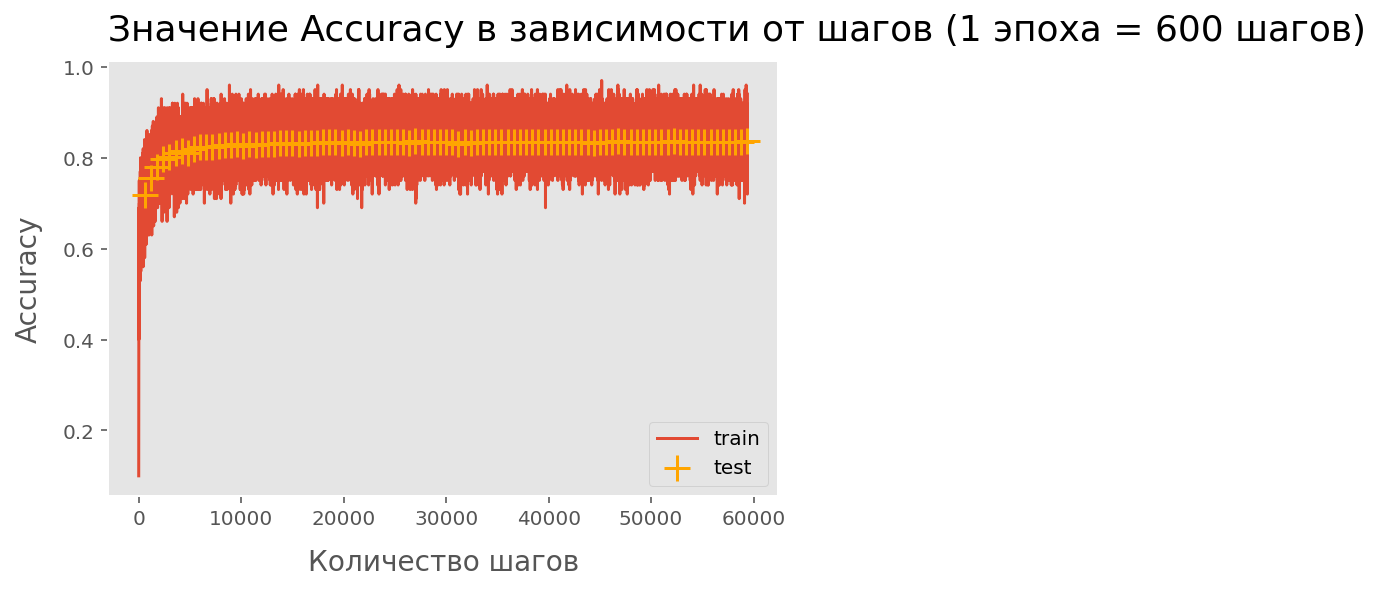

Test loss: 0.01579
Test accuracy: 83.66%


In [ ]:
hist_train_loss_by_step = []
hist_test_loss_by_epoch = []

hist_train_acc_by_step = []
hist_test_acc_by_epoch = []

for epoch in range(1, 100):  
    for batch in train_dataloader:
        # Считаем метрики обучающей выборки для одного шага
        metrics = train_logistic_regression(weights, intercept, batch, loss, optimizer)
        batch_loss, batch_accuracy = metrics
        hist_train_loss_by_step.append(batch_loss)
        hist_train_acc_by_step.append(batch_accuracy)

    # Считаем метрики тестовой выборки для одной эпохи
    test_loss = 0
    test_acc = 0
    steps = len(test_dataloader) 

    with torch.no_grad():
        for images, labels in test_dataloader:
            images, labels = images.to(device), labels.to(device)
            y_pred = network(images, weights.to(device), intercept.to(device))
            loss_ = loss(y_pred, labels)
      
            loss_accum = loss_.item()
            batch_size = y_pred.shape[0]
            batch_loss = loss_accum / batch_size

            y_pred_class = torch.max(y_pred, axis=1)[1]
            num_pred_correct = (y_pred_class == labels).sum().item()
            batch_accuracy = num_pred_correct / batch_size

            test_loss += batch_loss
            test_acc += batch_accuracy

    hist_test_loss_by_epoch.append(test_loss / steps)
    hist_test_acc_by_epoch.append(test_acc / steps)

    clear_output()

    plot_metric(hist_train_loss_by_step, hist_test_loss_by_epoch, "Loss")
    plot_metric(hist_train_acc_by_step, hist_test_acc_by_epoch, "Accuracy")

    print(f"Test loss: {hist_test_loss_by_epoch[-1]:.4}")
    print(f"Test accuracy: {hist_test_acc_by_epoch[-1] * 100:.4}%")

#### Вопросы к секции: 

* Своими словами и без математики объясните благодаря чему Adam дает несмещенную оценку на квадрат градиента

Все таки объясню через математику :)

Вспомним, что оценка $\hat \theta_n = \hat \theta(X_1, ..., X_n)$ является несмещенной, если $\mathbb{E}[\hat \theta_n] = \theta$, то есть когда математическое ожидание оценки параметра равно истинному параметру.

Вспомним, что $\nu_t = \beta_2 \nu_{t-1} + (1 - \beta_2)g_t^2 = (1 - \beta_2)  \sum^{t-1}_{i=0} \beta_2^{i}g_t^2$.

$\mathbb{E}[\nu_t] = \mathbb{E}\left[(1 - \beta_2)  \sum^{t-1}_{i=0} \beta_2^{i}g_t^2\right] = (1 - \beta_2) \sum^{t-1}_{i=0} \beta_2^{i} \mathbb{E}[g_t^2] = (1 - \beta_2)(1 + \beta_2 + \beta_2^2 + ... + \beta_2^{t-1})\mathbb{E}[g_t^2] = (1 - \beta_2) \dfrac{1 - \beta_2}{1 - \beta_2}(1 + \beta_2 + \beta_2^2 + ... + \beta_2^{t-1})\mathbb{E}[g_t^2] = \dfrac{1 - \beta_2}{1 - \beta_2}(1 - \beta_2 + \beta_2 -  \beta_2^2 +  \beta_2^2 - ... - \beta_2^{t-1} + \beta_2^{t-1} - \beta_2^{t})\mathbb{E}[g_t^2] = \dfrac{1 - \beta_2}{1 - \beta_2}(1 - \beta_2^{t})\mathbb{E}[g_t^2]  = (1 - \beta_2^{t})\mathbb{E}[g_t^2].$

Следовательно, __Adam дает несмещенную оценку на квадрат градиента из-за деления $\nu_t$ на $1 - \beta_2^{t}$__:

$\mathbb{E}[\hat \nu_t] = \mathbb{E}\left[\dfrac{\nu_t}{1 - \beta_2^{t}}\right]= \mathbb{E}[g_t^2].$

* Когда модель начала переобучаться? Как вы это поняли? Сделайте визуализацию и докажите свою точку зрения.

Никогда. Под переобучением модели мы понимаем, что ее качество на новых данных — тествой выборке — существенно хуже качества на обучающей выборке. Как мы видим выше, для графика доли праильных ответов эта характеристика не выполняется.

### Моя первая нейросеть (4 балла)

В данной секции вам нужно сделать следующие вещи: 

* Реализовать три разных архитектуры нейросетей. Эти архитектуры должны принципиально отличаться друг от друга. Разрешается одной из архитекур брать полностью полносвязную модель. Остальные две должны быть сверточными и сильно отличаться друг от друга. К примеру, одна из таких архитектур может быть VGG подобная сеть, а другая ResNet подобная архитектура. 

* Написать цикл для обучения которым можно обучать все три модели без изменений кода

* Попробовать каждую модель с двумя оптимизаторами: RMSprop и SGD with momentum

* Визуализировать результаты перфоманса каждой модели (две метрики минимум для каждого сетапа, например, лосс и долю правильных ответов). В данном пункте мы ждем от вас визуализацию зависимости метрики от номера итерации обучения.

* Сделать выводы какие были модели были лучше и как вы думаете почему?

Напишем цикл обучения. Для этого воспользуемся кодом из второго задания и немного перепишем его.

In [ ]:
def plot_metric(train_metric, test_metric, title):
    plt.figure()
    plt.title(f'Значение {title} в зависимости от шагов (1 эпоха = {len(train_dataloader)} шагов)',  
              pad=10, fontsize=18, loc='left')
    plt.ylabel(f'{title}', labelpad=10, fontsize=14)
    plt.xlabel('Количество шагов', labelpad=10, fontsize=14)
    plt.plot(train_metric, label='train', zorder=1)
  
    steps = list(range(0, len(train_metric) + 1, int(len(train_metric) / len(test_metric))))[1:]
    plt.scatter(steps, test_metric, marker='+', s=180, c='orange', label='test', zorder=2)
  
    plt.legend(loc='best')
    plt.grid()

    plt.show()

def train_model(model, optimizer, criterion, train_dataloader, 
                test_dataloader, num_epoch):
    hist_train_loss_by_step = []
    hist_test_loss_by_epoch = []

    hist_train_acc_by_step = []
    hist_test_acc_by_epoch = []
    
    for epoch in range(1, num_epoch):
        print(f"Train Epoch: {epoch}")
        with tqdm(total=len(train_dataloader), file=sys.stdout) as prbar:
            for batch in train_dataloader:
                images, labels = batch[0].to(device), batch[1].to(device)

                y_pred = model(images)
                loss = criterion(y_pred, labels)    
          
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
          
                loss_accum = loss.item()
                batch_size = y_pred.shape[0]
                batch_loss = loss_accum / batch_size
          
                y_pred_class = torch.max(y_pred, axis=1)[1]
                num_pred_correct = (y_pred_class == labels).sum().item()
                batch_accuracy = num_pred_correct / batch_size

                hist_train_loss_by_step.append(batch_loss)
                hist_train_acc_by_step.append(batch_accuracy)

                # Обновляем prbar
                prbar.set_description(
                    f'Loss: {batch_loss:.4} '
                    f'Accuracy: {batch_accuracy * 100:.4}%'
                )
                prbar.update(1)

        # Считаем метрики тестовой выборки для одной эпохи
        test_loss = 0
        test_acc = 0
        steps = len(test_dataloader) 

        print(f"Test Epoch: {epoch}")
        with torch.no_grad() and tqdm(total=len(test_dataloader), file=sys.stdout) as prbar:
            for batch in test_dataloader:
                images, labels = batch[0].to(device), batch[1].to(device)
            
                y_pred = model(images)
                loss = criterion(y_pred, labels)
      
                loss_accum = loss.item()
                batch_size = y_pred.shape[0]
                batch_loss = loss_accum / batch_size

                y_pred_class = torch.max(y_pred, axis=1)[1]
                num_pred_correct = (y_pred_class == labels).sum().item()
                batch_accuracy = num_pred_correct / batch_size
                
                test_loss += batch_loss
                test_acc += batch_accuracy

                # Обновляем prbar
                prbar.set_description(
                    f'Loss: {batch_loss:.4} '
                    f'Accuracy: {batch_accuracy * 100:.4}%'
                )
                prbar.update(1)

        hist_test_loss_by_epoch.append(test_loss / steps)
        hist_test_acc_by_epoch.append(test_acc / steps)

        clear_output()

        plot_metric(hist_train_loss_by_step, hist_test_loss_by_epoch, "Loss")
        plot_metric(hist_train_acc_by_step, hist_test_acc_by_epoch, "Accuracy")

        print(f"Test loss: {hist_test_loss_by_epoch[-1]:.4}")
        print(f"Test accuracy: {hist_test_acc_by_epoch[-1] * 100:.4}%")

1. Первая модель будет иметь четыре полносвязных слоя с функцией активации ReLU между ними.

In [ ]:
class SimpleNeuralNetwork(nn.Module):
    def __init__(self):
        super(SimpleNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc_1 = nn.Linear(784, 256)
        self.fc_2 = nn.Linear(256, 128)
        self.fc_3 = nn.Linear(128, 64)
        self.fc_4 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        return self.fc_4(torch.relu(self.fc_3(torch.relu(self.fc_2(torch.relu(self.fc_1(x)))))))

first_model = SimpleNeuralNetwork().to(device)

a) RMSprop

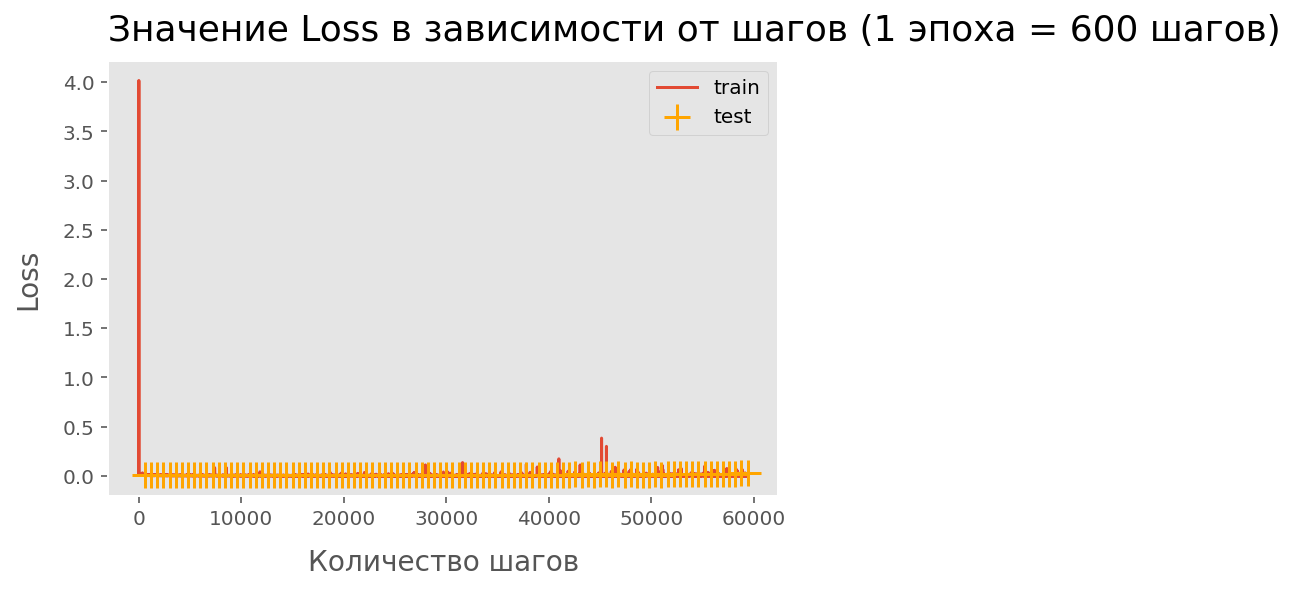

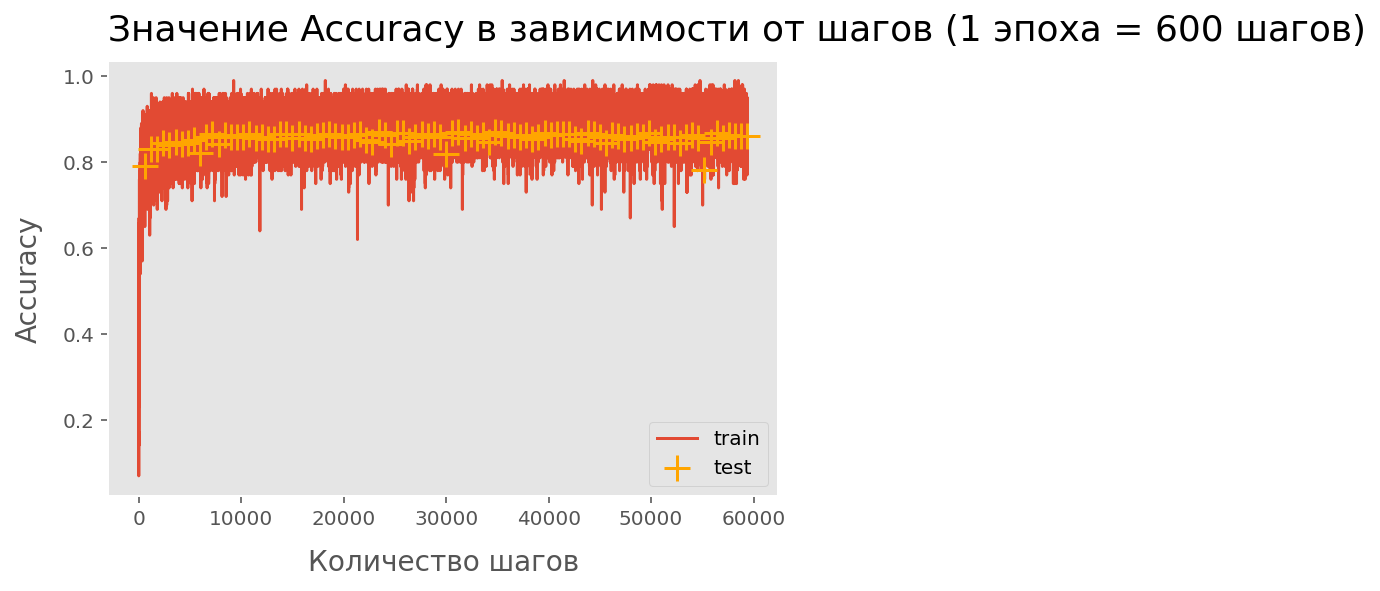

Test loss: 0.02758
Test accuracy: 86.18%


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(first_model.parameters(), lr=0.01, alpha=0.99)
train_model(first_model, optimizer, criterion, train_dataloader, 
            test_dataloader, num_epoch=100)

б) SGD with momentum

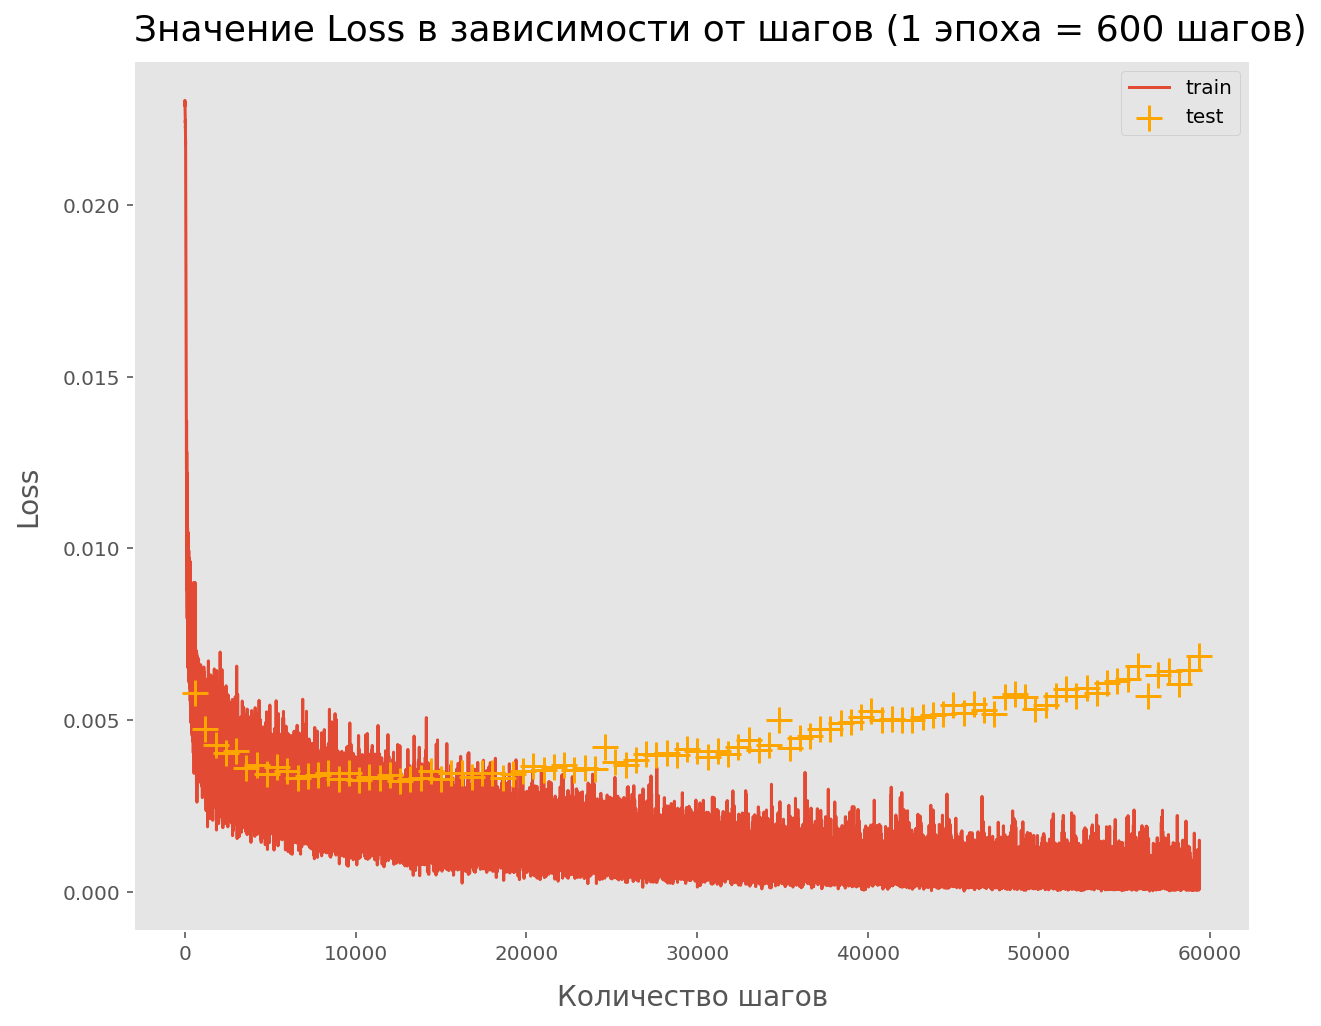

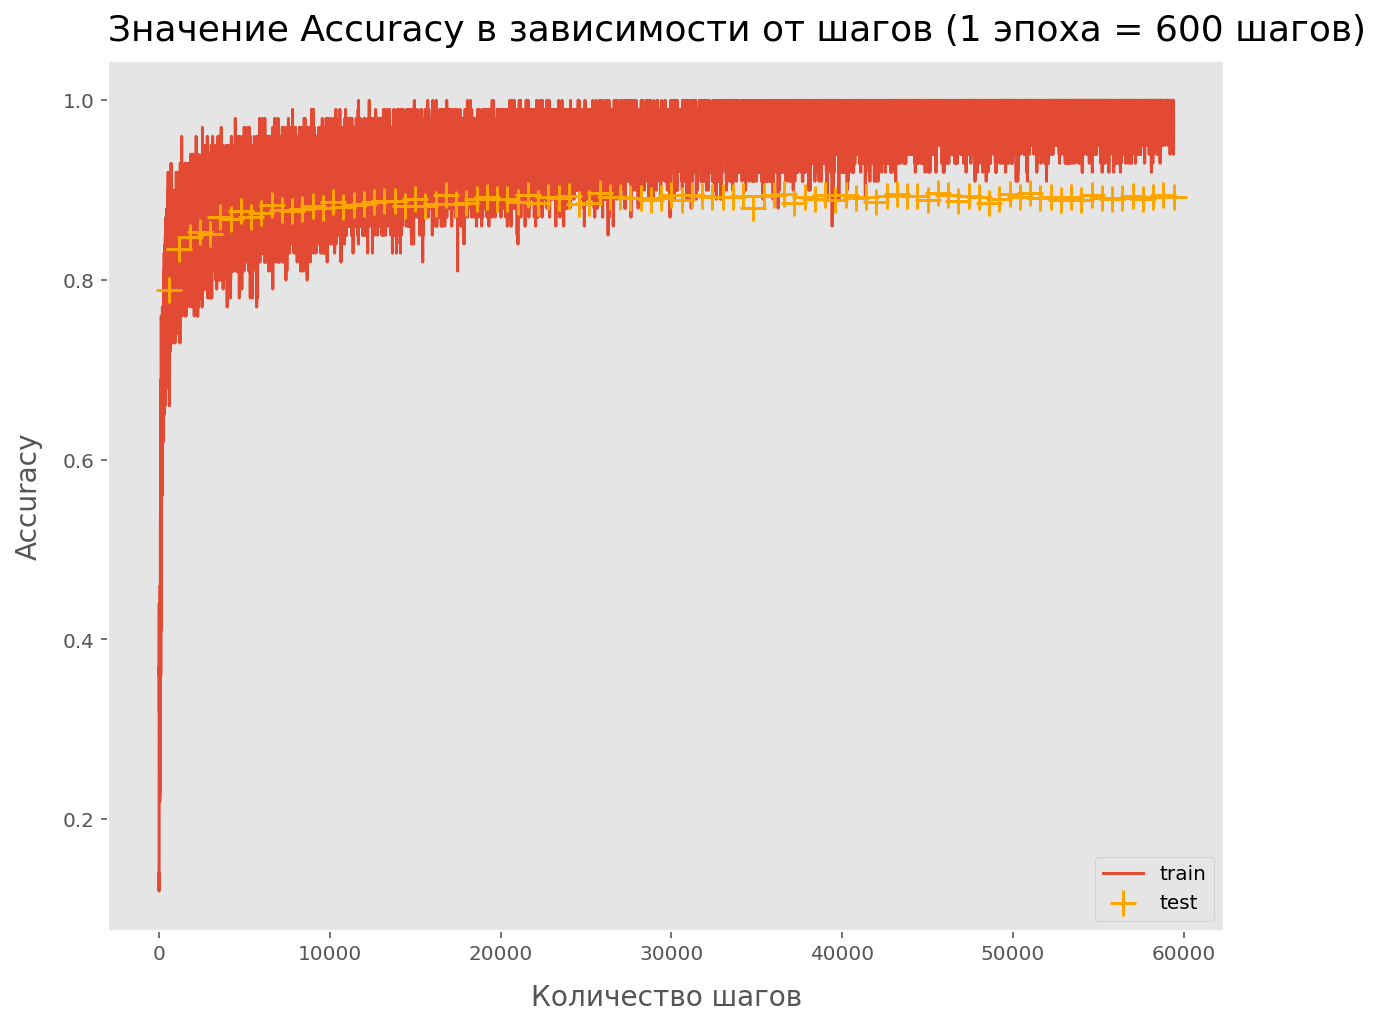

Test loss: 0.006855
Test accuracy: 89.27%


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(first_model.parameters(), lr=0.01, momentum=0.9, )
train_model(first_model, optimizer, criterion, train_dataloader, 
            test_dataloader, num_epoch=100)

2. Вторая модель будет иметь структуру наподобие VGG.

In [ ]:
class VGGEncoder(nn.Module):
    def __init__(self, in_channels):
        super(VGGEncoder, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 
            self.get_vgg_block(16, 32),
            self.get_vgg_block(32, 64),
            self.get_vgg_block(64, 128)
        )

    def get_vgg_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(), 
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
         )
      
    def forward(self, x):
        return self.block(x)


class VGGDecoder(nn.Module):
    def __init__(self, num_classes):
        super(VGGDecoder, self).__init__()
        self.block = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 64),
            nn.ReLU(), 
            nn.Dropout(p=0.5), 
            nn.Linear(64, num_classes),
            nn.Softmax(dim=-1)
        )
  
    def forward(self, x):
        return self.block(x)


class VGG(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(VGG, self).__init__() # Для вызова конструктора родительского класса
        self.encoder = VGGEncoder(in_channels)
        self.decoder = VGGDecoder(num_classes)
    
    def forward(self, x):
        output = self.encoder(x)
        output = self.decoder(x)
        return output

## Реализовать именно этот класс
second_model = VGG(1, 10).to(device)

a) RMSprop

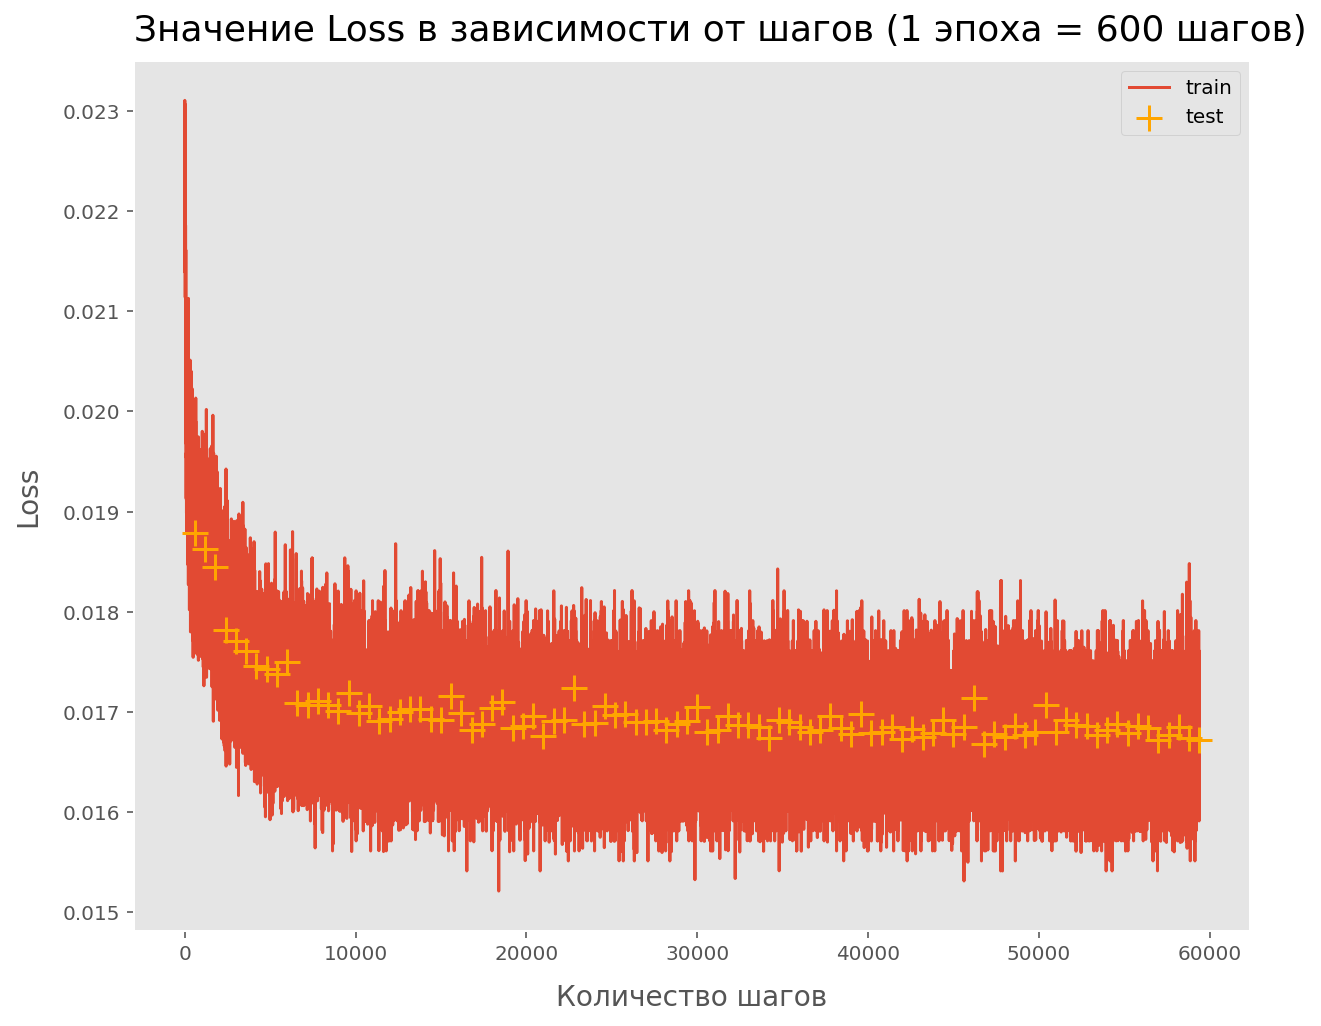

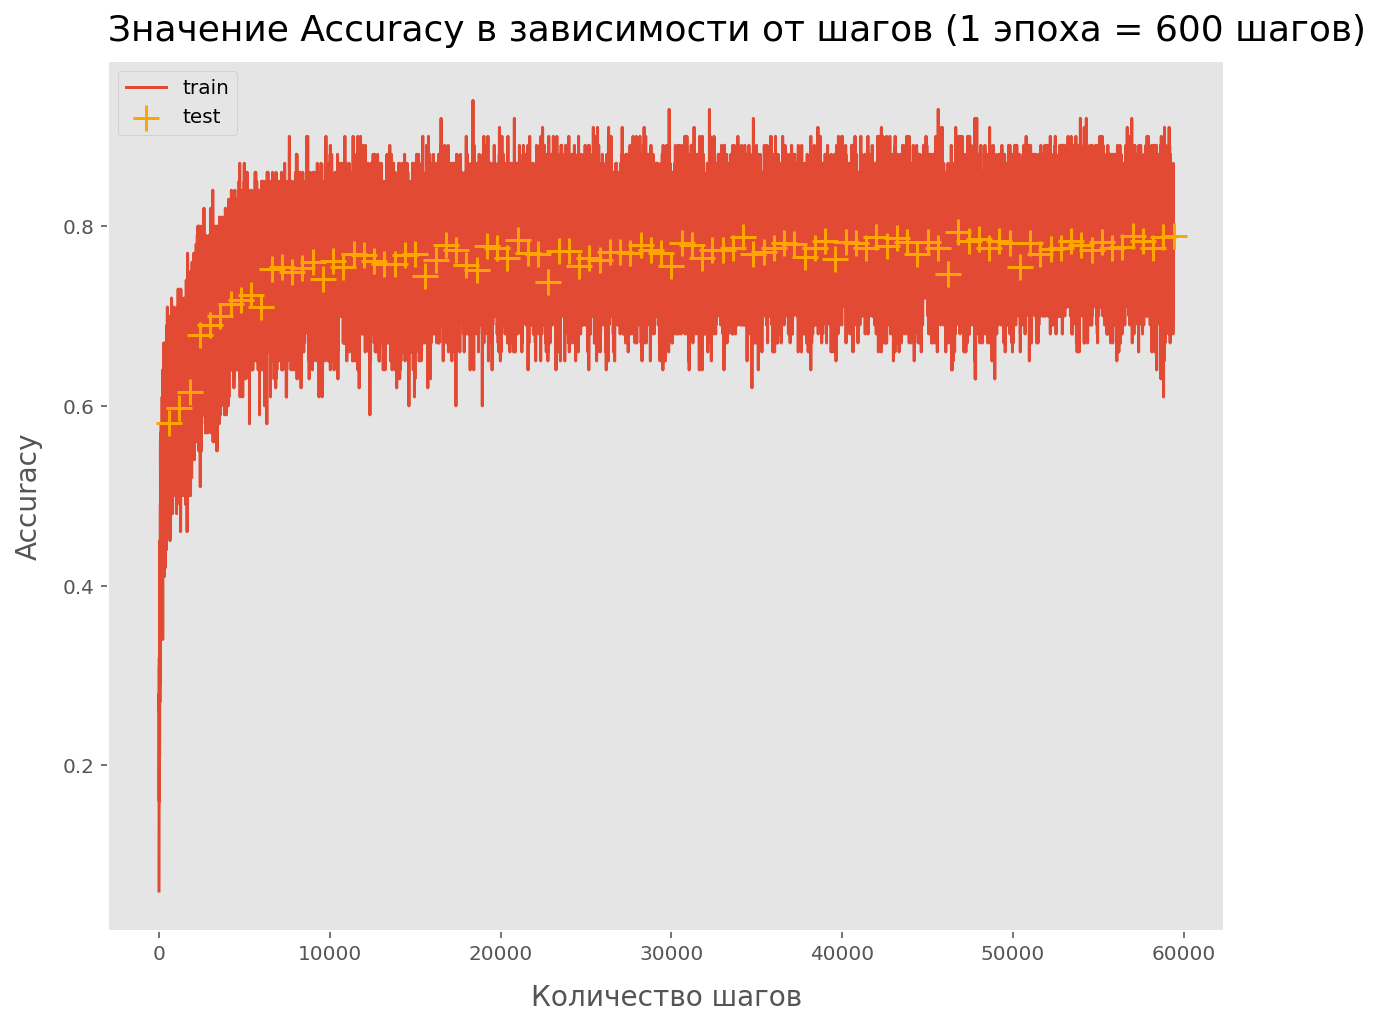

Test loss: 0.01672
Test accuracy: 78.91%


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(second_model.parameters(), lr=0.01, alpha=0.99)
train_model(second_model, optimizer, criterion, train_dataloader, 
            test_dataloader, num_epoch=100)

б) SGD with momentum

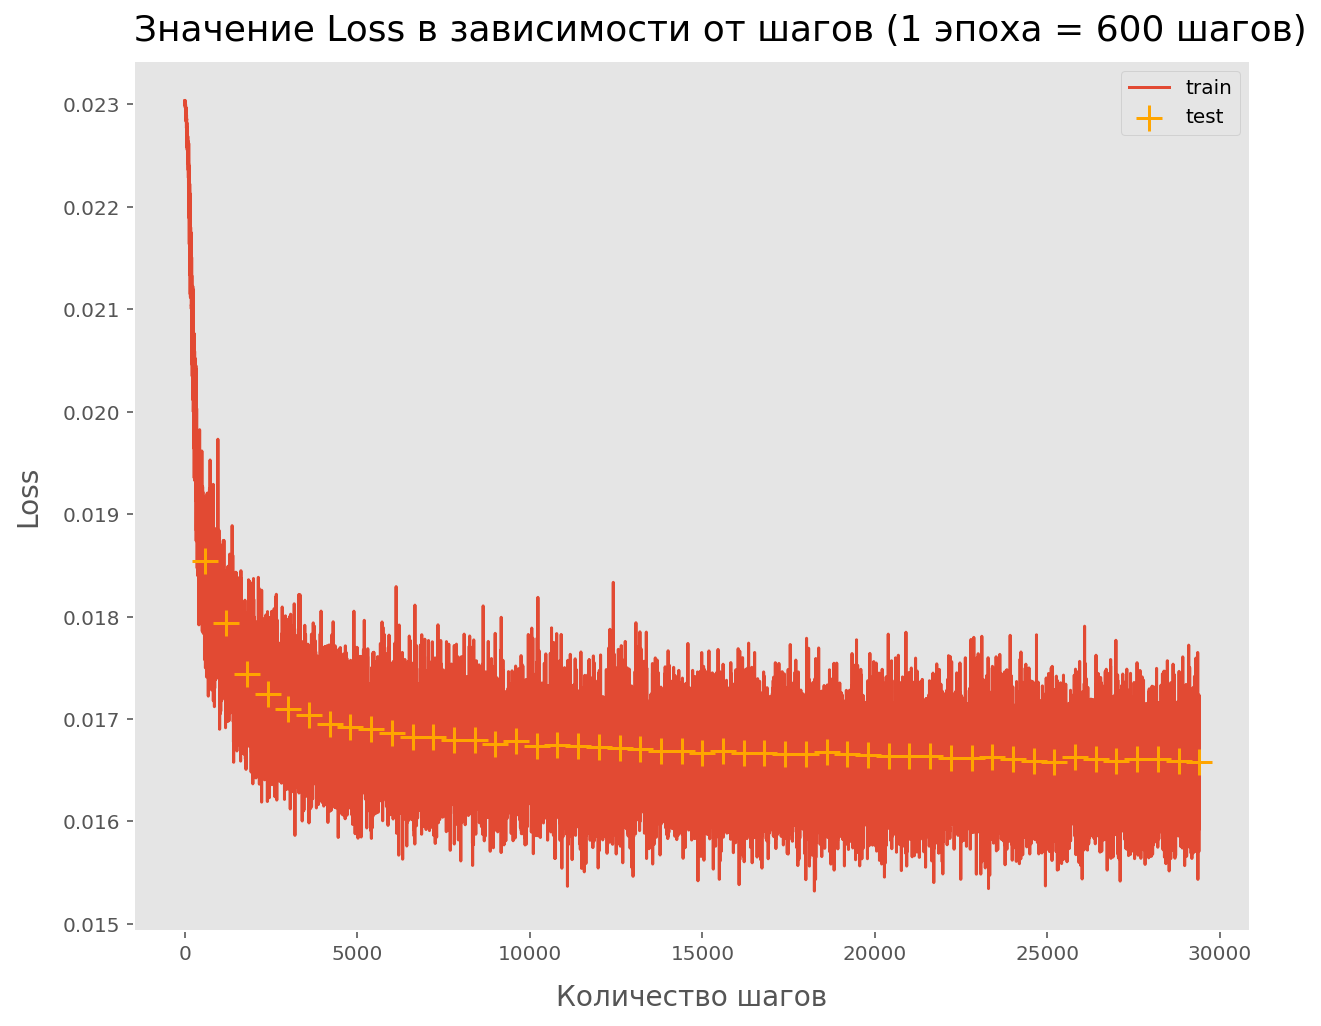

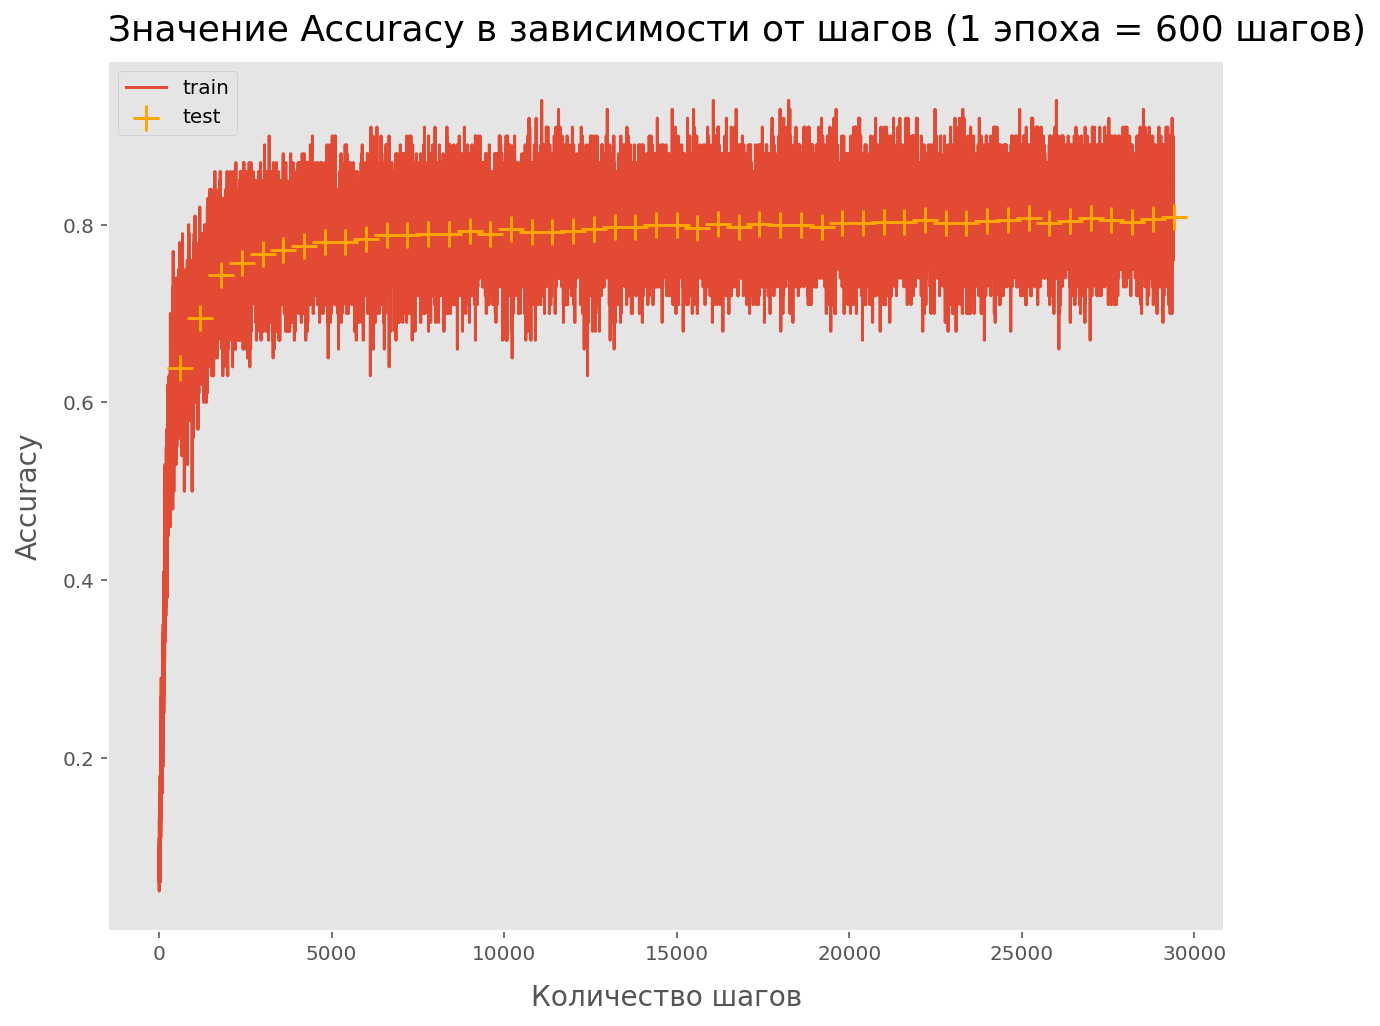

Test loss: 0.01658
Test accuracy: 80.83%


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(second_model.parameters(), lr=0.01, momentum=0.9)
train_model(second_model, optimizer, criterion, train_dataloader, 
            test_dataloader, num_epoch=50)

3. Третья модель будет иметь структуру наподобие ResNet-18. Так как в статье были картинки 128x128, а у нас 28x28 будем использовать более маленькие фильтры, а так же паддинг.

In [ ]:
# Воспользуемся ModuleDict, чтобы использовать разные функции активации во время обучения нашей нейросети
def get_activation_func(activation):
    return nn.ModuleDict([
          ['relu', nn.ReLU()],
          ['leaky_relu', nn.LeakyReLU()],
          ['selu', nn.SELU()],
          ['elu', nn.ELU()]                     
    ])[activation]


class ResNetBlock(nn.Module):
    def __init__(self, channels, activation):
        super(ResNetBlock, self).__init__()
        self.block = nn.Sequential(
            # Первый подблок F(x)
            nn.Conv2d(channels, channels, kernel_size=3),
            nn.BatchNorm2d(channels),
            get_activation_func(activation),

            # Второй подблок F(x), после которого будет skip connection или shortcut (то есть F(x) + x)
            nn.Conv2d(channels, channels, kernel_size=3),
            nn.BatchNorm2d(channels)
        )

        self.activation = get_activation_func(activation)

    def forward(self, x):
        # Применям функцию активации от F(x) + x (то есть делаем skip connection)
        output = self.activation(self.block(x) + x)
        output = self.activation(self.block(output) + output)
        return output

    
class ResNetEncoder(nn.Module):
    def __init__(self, in_channels):
        super(ResNetEncoder, self).__init__()
        self.conv_1 = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=7, stride=2),
            nn.BatchNorm2d(64),
            get_activation_func('relu'),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Далее идеет 4 блока, однако мы будем использовать только 1 блок, ибо у нас слишком 
        # маленькие картинки (в статье были 128x128, а у нас всего 28x28)
        # Как-то не особо very deep :(
          
        # Также в статье были представлены Residual блоки и Bottleneck блоки
        # Будем использовать первый тип блоков с функцией активации SELU
        self.conv_2 = ResNetBlock(64, 'selu')
        #self.conv_3 = ResNetBlock(128, 'selu')
        #self.conv_4 = ResNetBlock(256, 'selu')
        #self.conv_5 = ResNetBlock(512, 'selu')

        # Свертки для перепрыгивания между блоками
        self.inter_2 = self.intermediate_conv(64, 128)
        #self.inter_3 = self.intermediate_conv(128, 256)
        #self.inter_4 = self.intermediate_conv(256, 512)

    # Определим функцию, которая будет "перепрыгивать" через блоки
    def intermediate_conv(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3),
            nn.BatchNorm2d(out_channels),
            get_activation_func('relu')
        )

    def forward(self, x):
        output = self.conv_1(x)
        output = self.inter_2(self.conv_2(output))
        #output = self.inter_3(self.conv_3(output))
        #output = self.inter_4(self.conv_4(output))
        #output = self.conv_5(output)
        return output

    
class ResNetDecoder(nn.Module):
    def __init__(self, num_clsses):
        super(ResNetDecoder, self).__init__()
        self.decoder = nn.Sequential(
            # В ResNet под конец используется Average Pooling
            nn.AvgPool2d(kernel_size=2),
            nn.Flatten(),
            nn.Linear(128, num_clsses),
            nn.Softmax(dim=-1)
        )
  
    def forward(self, x):
        return self.decoder(x)


class ResNet(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(ResNet, self).__init__()
        self.encoder = ResNetEncoder(in_channels)
        self.decoder = ResNetDecoder(num_classes)

    def forward(self, x):
        output = self.encoder(x)
        output = self.decoder(output)
        return output

In [ ]:
third_model = ResNet(1, 10).to(device)

a) RMSprop

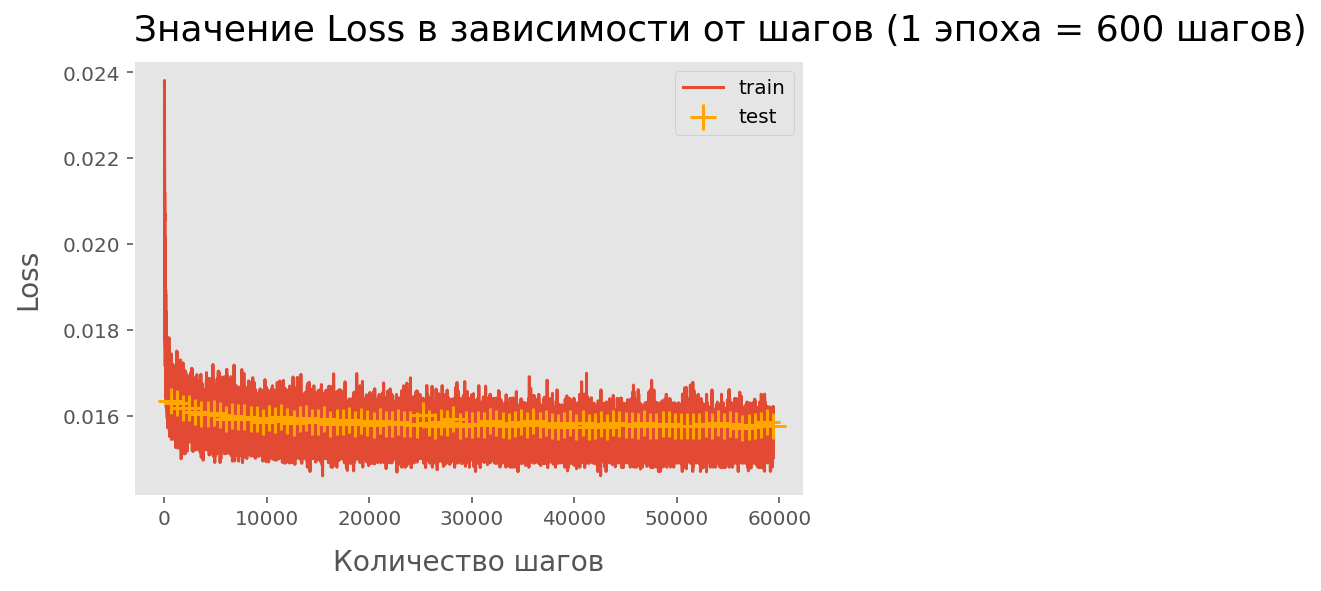

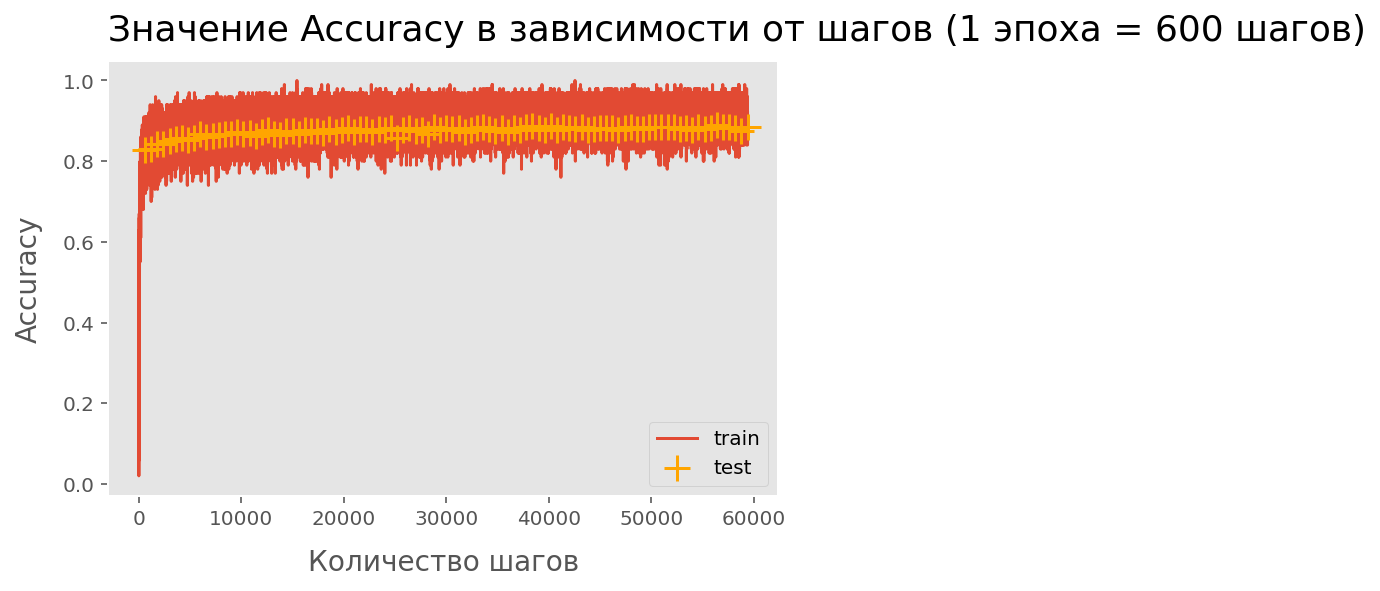

Test loss: 0.01576
Test accuracy: 88.5%


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(third_model.parameters(), lr=0.01, alpha=0.99)
train_model(third_model, optimizer, criterion, train_dataloader, 
            test_dataloader, num_epoch=100)

б) SGD with momentum

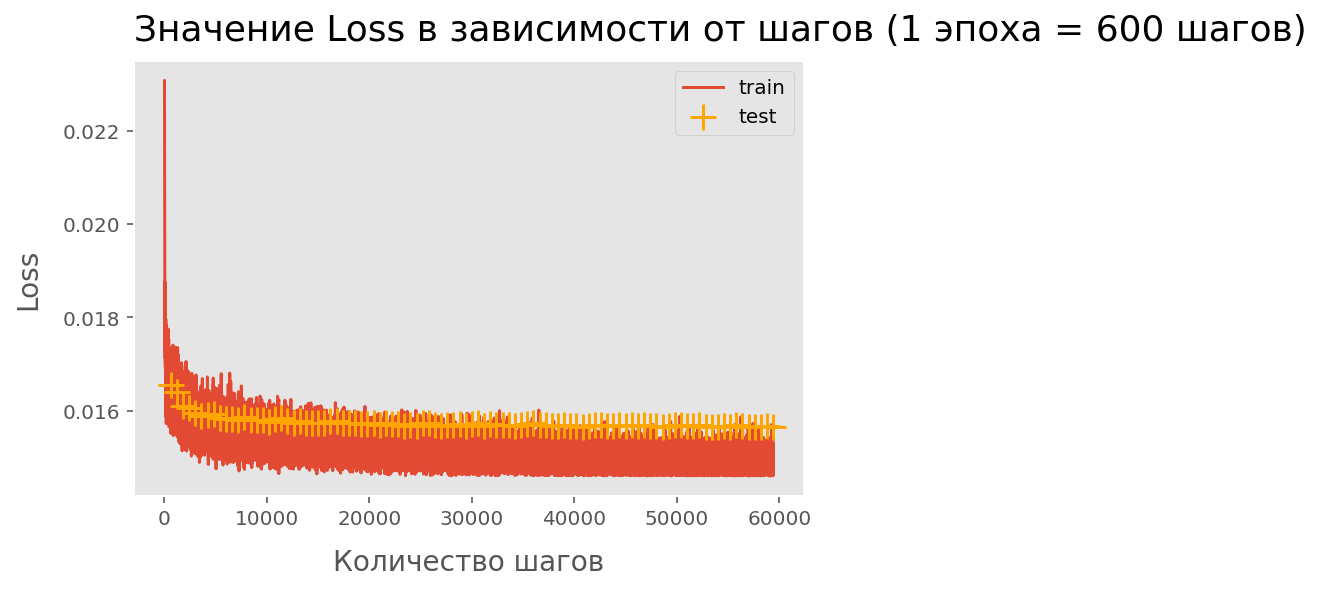

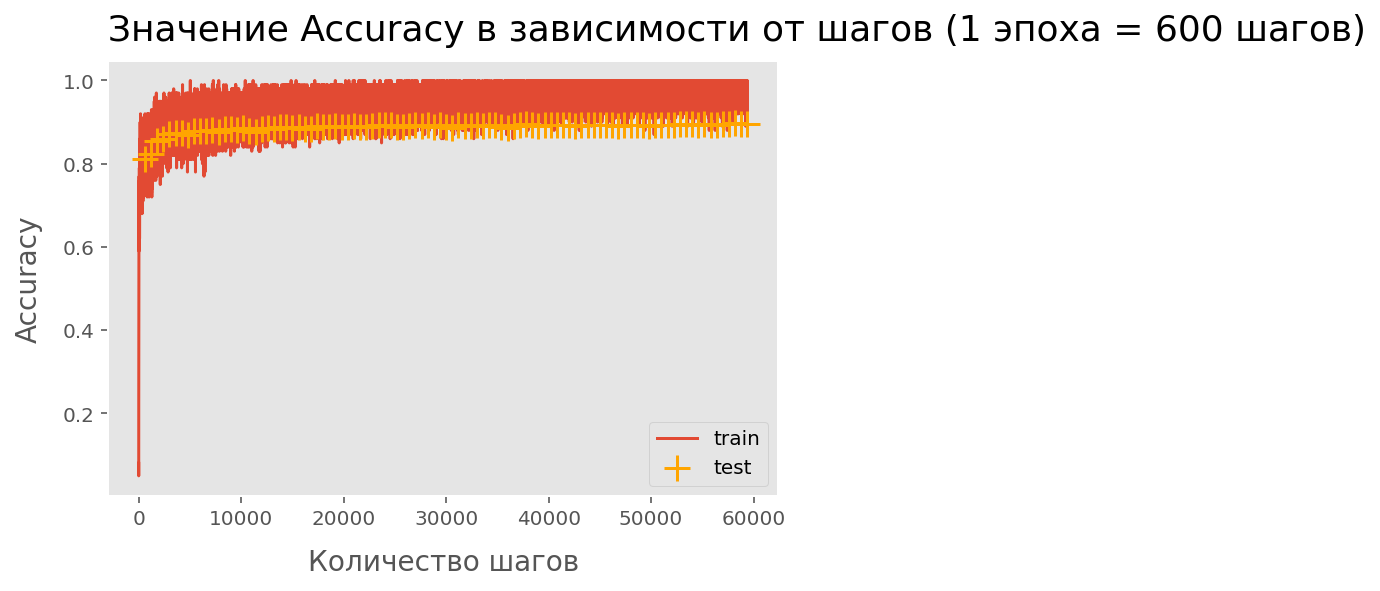

Test loss: 0.01567
Test accuracy: 89.48%


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(third_model.parameters(), lr=0.01, momentum=0.9)
train_model(third_model, optimizer, criterion, train_dataloader, 
            test_dataloader, num_epoch=100)

Вывод:

Хуже всего себя проявила нейросеть по типу VGG. Скорее всего, модель была недостаточно глубокая и не смогла распознать сложные взаимосвязи.

Простая модель из полносвязных слоев показала неплохое качество при оптимизации по SGD с momentum, однако она переобучилась.

Фаворитом стала модель, похожая на ResNet-18, при оптимизации по SGD с momentum, получив $89.48\%$ правильных ответов на последней эпохе. Благодаря своей архитектуре — добавлению skip connections — она не переобучается и позволяет делать более глубокую нейронную сеть.

Данная картинка показывает, как ведет себя лосс простой нейронной сети и лосс ResNet, что мы можем увидеть и на иллюстрациях вышк: 
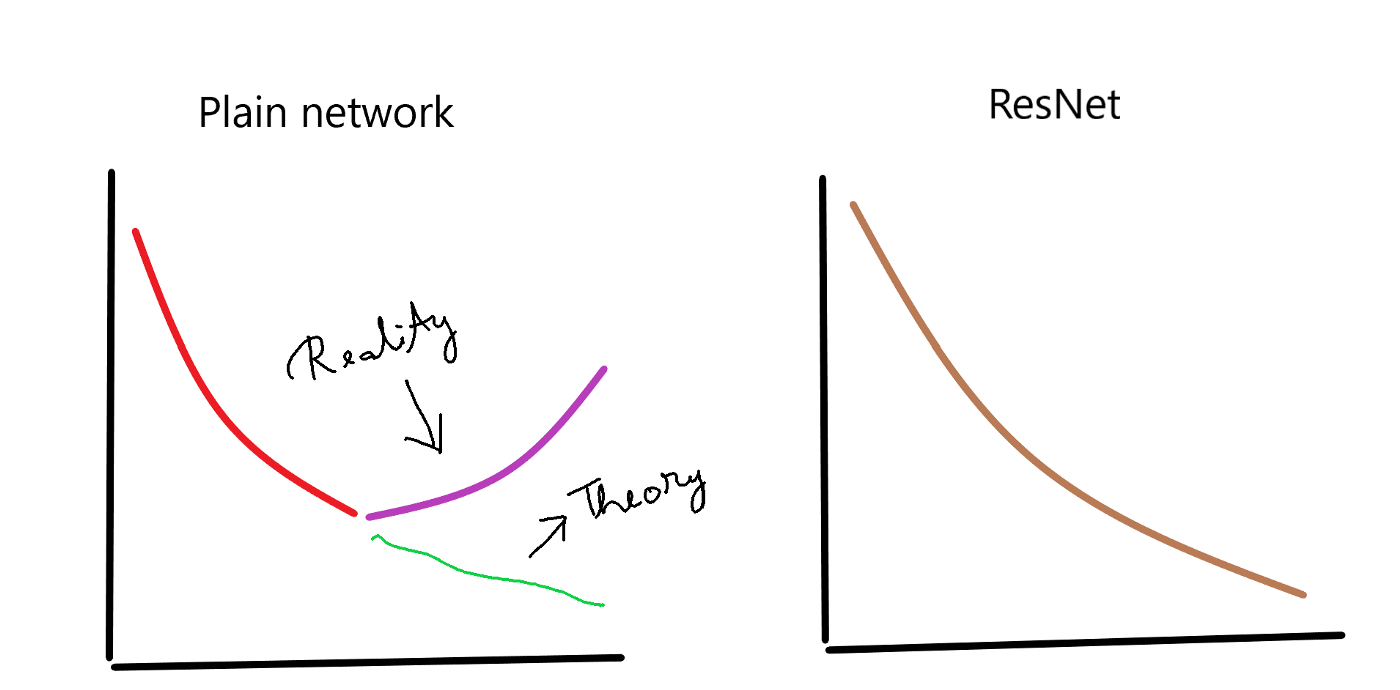